In [32]:
import pandas as pd

df = pd.read_csv('../bin/Release/net8.0/BenchResults.csv')

print(df.head())

  Algo   Distance  Seed  ElapsedTime  PointCount  CubicVolume  Iterations  \
0  ACO  60.152807    20        11343           5          125           1   
1  ACO  55.513094    20        11343           5          125           1   
2  NNH  55.513094    20         3091           5          125           1   
3  ACO  32.941233    21           34           5          125           1   
4  NNH  32.941233    21           10           5          125           1   

   AOSPositions  
0             1  
1             2  
2             1  
3             1  
4             1  


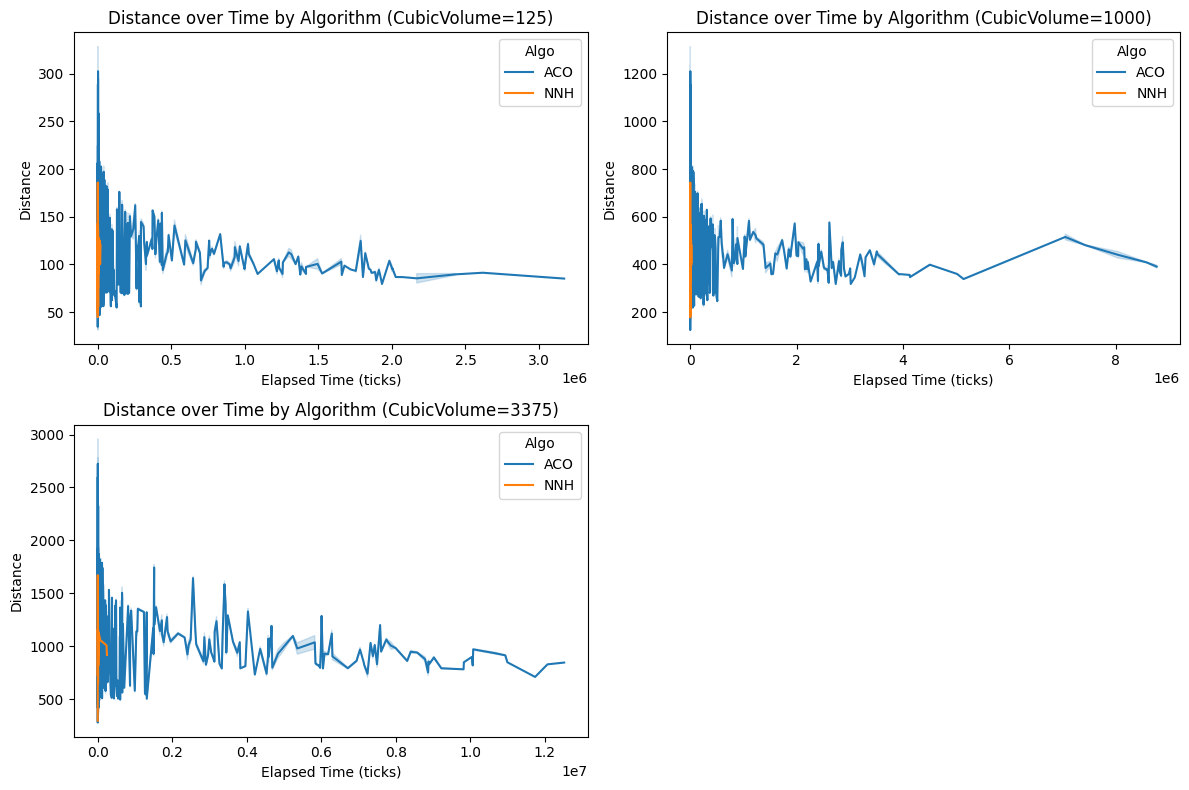

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
num_volumes = len(df['CubicVolume'].unique())
for i, volume in enumerate(df['CubicVolume'].unique(), start=1):
    plt.subplot(2, 2, i)
    volume_data = df[df['CubicVolume'] == volume]
    sns.lineplot(x="ElapsedTime", y="Distance", hue="Algo", data=volume_data)
    plt.title(f"Distance over Time by Algorithm (CubicVolume={volume})")
    plt.xlabel("Elapsed Time (ticks)")
    plt.ylabel("Distance")

plt.tight_layout()
plt.show()

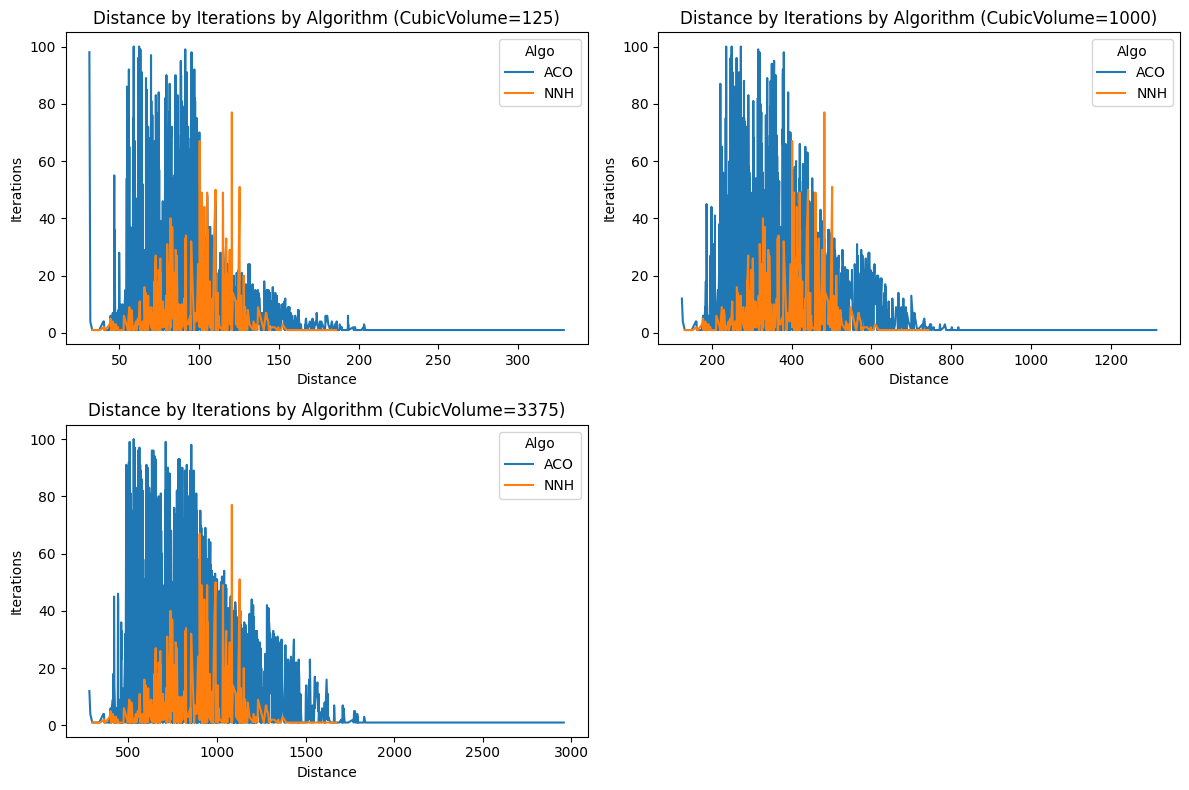

In [34]:
plt.figure(figsize=(12, 8))
num_volumes = len(df['CubicVolume'].unique())
for i, volume in enumerate(df['CubicVolume'].unique(), start=1):
    plt.subplot(2, 2, i)
    volume_data = df[df['CubicVolume'] == volume]
    sns.lineplot(x="Distance", y="Iterations", hue="Algo", data=volume_data)
    plt.title(f"Distance by Iterations by Algorithm (CubicVolume={volume})")
    plt.ylabel("Iterations")
    plt.xlabel("Distance")

plt.tight_layout()
plt.show()

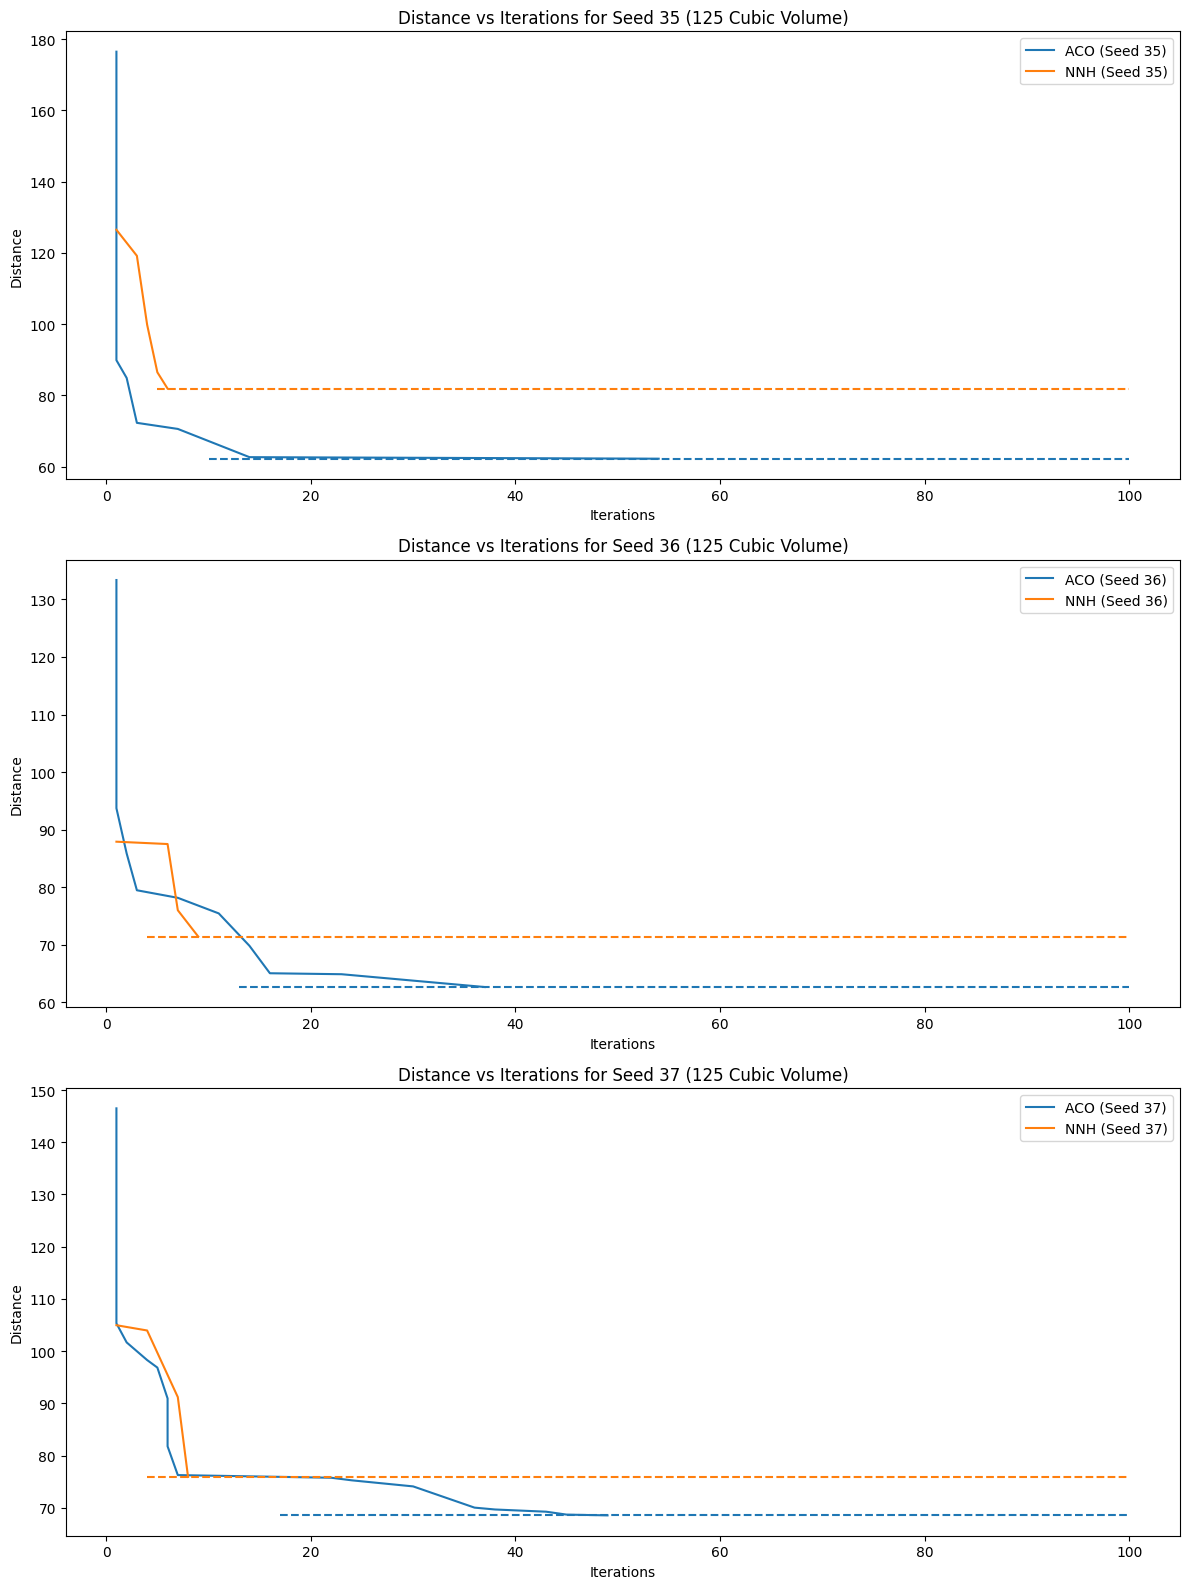

In [35]:
filtered_data1 = df[(df['Seed'] >= 35) & (df['Seed'] <= 37) & (df['PointCount'] == 20) & (df["CubicVolume"] == 125)]
# Plot Distance vs Iterations for each algorithm and seed
fig, axes = plt.subplots(3, 1, figsize=(12, 16))

for i, seed in enumerate(range(35, 38)):
    seed_data = filtered_data1[filtered_data1['Seed'] == seed]
    ax = axes[i]
    
    for algo in ['ACO', 'NNH']:
        algo_data = seed_data[seed_data['Algo'] == algo]
        ax.plot(algo_data['Iterations'], algo_data['Distance'], label=f"{algo} (Seed {seed})")
        
        # Repeat the last data point if there are fewer iterations
        if len(algo_data) < 100:
            last_distance = algo_data['Distance'].iloc[-1]
            ax.plot([len(algo_data), 100], [last_distance, last_distance], linestyle='--', color=ax.lines[-1].get_color())
            
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Distance')
    ax.set_title(f'Distance vs Iterations for Seed {seed} (125 Cubic Volume)')
    ax.legend()

plt.tight_layout()
plt.show()

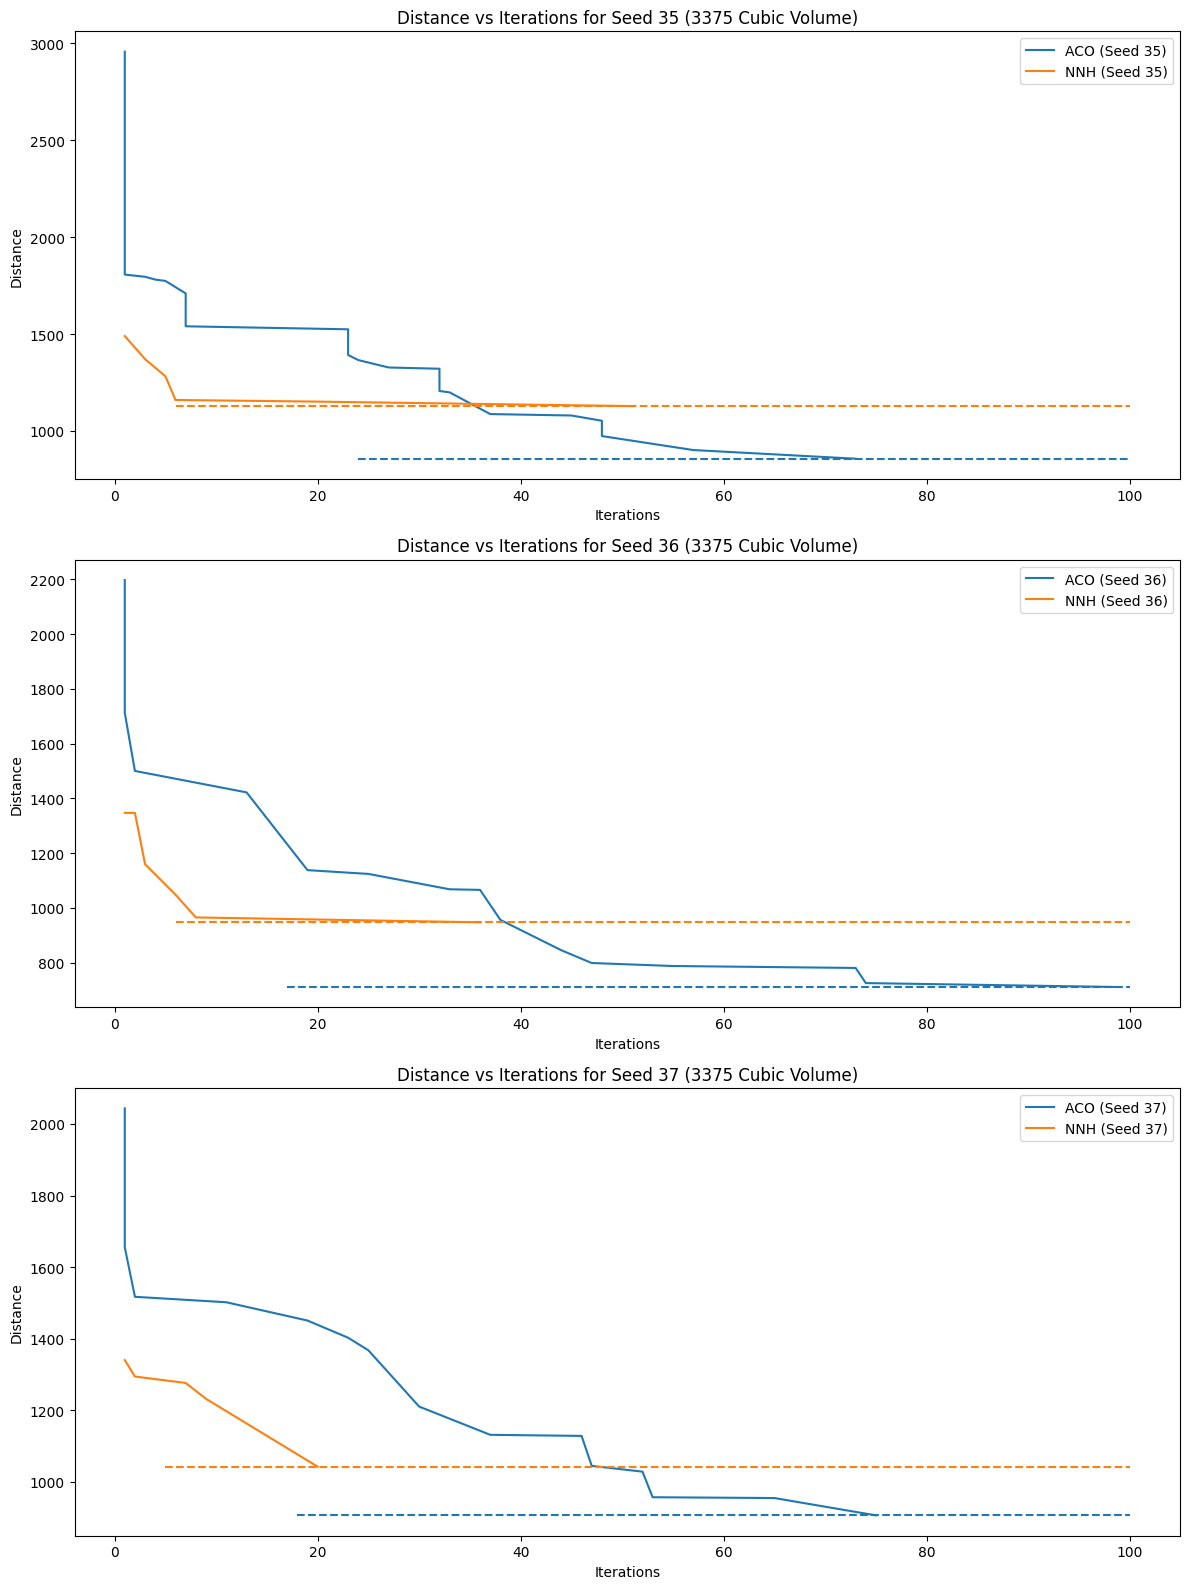

In [36]:
filtered_data2 = df[(df['Seed'] >= 35) & (df['Seed'] <= 37) & (df['PointCount'] == 80) & (df["CubicVolume"] == 3375)]

# Plot Distance vs Iterations for each algorithm and seed
fig, axes = plt.subplots(3, 1, figsize=(12, 16))

for i, seed in enumerate(range(35, 38)):
    seed_data = filtered_data2[filtered_data2['Seed'] == seed]
    ax = axes[i]
    
    for algo in ['ACO', 'NNH']:
        algo_data = seed_data[seed_data['Algo'] == algo]
        ax.plot(algo_data['Iterations'], algo_data['Distance'], label=f"{algo} (Seed {seed})")
        
        # Repeat the last data point if there are fewer iterations
        if len(algo_data) < 100:
            last_distance = algo_data['Distance'].iloc[-1]
            ax.plot([len(algo_data), 100], [last_distance, last_distance], linestyle='--', color=ax.lines[-1].get_color())
            
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Distance')
    ax.set_title(f'Distance vs Iterations for Seed {seed} (3375 Cubic Volume)')
    ax.legend()

plt.tight_layout()
plt.show()

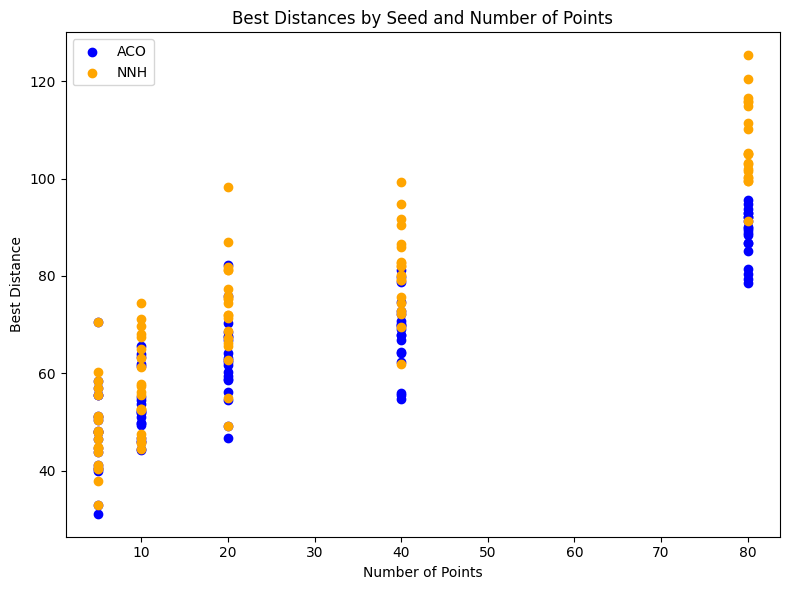

In [37]:
# Filter the data for relevant columns and algorithms
aco_data = df[df['Algo'] == 'ACO'][['PointCount', 'Distance', 'Seed']]
nnh_data = df[df['Algo'] == 'NNH'][['PointCount', 'Distance', 'Seed']]

# Calculate the best distance for each seed and number of points
aco_best = aco_data.groupby(['PointCount', 'Seed'])['Distance'].min().reset_index()
nnh_best = nnh_data.groupby(['PointCount', 'Seed'])['Distance'].min().reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(aco_best['PointCount'], aco_best['Distance'], color='blue', label='ACO')
ax.scatter(nnh_best['PointCount'], nnh_best['Distance'], color='orange', label='NNH')

ax.set_xlabel('Number of Points')
ax.set_ylabel('Best Distance')
ax.set_title('Best Distances by Seed and Number of Points')
ax.legend()

plt.tight_layout()
plt.show()